In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import re

In [2]:
path = '../data/shark_attacks.csv'
df = pd.read_csv(path, index_col=[0])

# Drop NaN rows

In [3]:
df = df.dropna()
df.head()
df.tail(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5484,1906.01.20,20-Jan-1906,1906.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Washing horses,Ramdayal,M,...,Y,12h00,1.8 m to 2.7 m [6' to 9'] shark,"Natal Mercury Pictorial, 1/31/1906; M. Levine,...",1906.01.20-Ramdayal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1906.01.20,1906.01.20,819.0
5498,1905.03.26,26-Mar-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,Lismore,Bathing,Richard Owen,M,...,N,Morning,5' shark,"Adelaide Advertiser, 3/31/1905",1905.03.26-Owen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.03.26,1905.03.26,805.0
5545,1901.07.30,30-Jul-1901,1901.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,...,Y,14h15,White shark,"M. Levine, GSAF",1901.07.30-Chandler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.30,1901.07.30,758.0
5648,1894.11.28,28-Nov-1894,1894.0,Unprovoked,AUSTRALIA,New South Wales,Newcastle,Bathing,Horace Hewison,M,...,N,Morning,10' to 12' shark,"Brisbane Courier, 1/7/1895, p.5",1894.11.28-Hewison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1894.11.28,1894.11.28,655.0
5684,1892.03.02,02-Mar-1892,1892.0,Provoked,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,Christopher Wang,M,...,N,Night,12' shark,"The Argus, 3/4/1892",1892.03.02-Wang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1892.03.02,1892.03.02,619.0
5814,1880.11.25,25-Nov-1880,1880.0,Unprovoked,AUSTRALIA,Queensland,"Petrie Bight, Brisbane River",Swimming,Alexey Drury,M,...,Y,Afternoon,Bull shark,"Bucks County Gazette, 2/10/1881, Sunday Mail (...",1880.11.25-AlexeyDrury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1880.11.25,1880.11.25,489.0
5922,1868.05.13,13-May-1868,1868.0,Unprovoked,INDIA,Hoogly River,Ghat,Standing,male,M,...,Y,Before 10h30,Identified as C. gangeticus by Dr. J. Fayrer,"J. Fayrer, M.D.",1868.05.13-Hindoo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1868.05.13,1868.05.13,381.0
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,...,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,...,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38.0


# Looking into 'Year'

In [4]:
years = df['Year'].unique()

In [5]:
years.sort()
years

array([   0., 1868., 1880., 1892., 1894., 1901., 1905., 1906., 1912.,
       1916., 1919., 1922., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018.])

In [6]:
year_serie = df['Year'].value_counts()
year_serie[year_serie >= 5]

2015.0    63
2012.0    54
2002.0    53
2007.0    52
2013.0    49
          ..
1937.0     5
1969.0     5
1977.0     5
1947.0     5
1951.0     5
Name: Year, Length: 66, dtype: int64

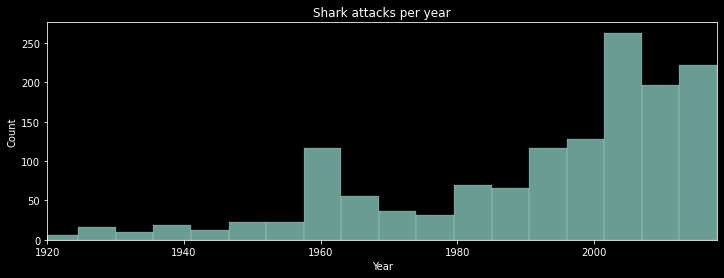

In [7]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
sns.histplot(df, x='Year')
plt.xlim(1920, df['Year'].max())
plt.title('Shark attacks per year')
plt.show()

# Looking into 'Country'

In [8]:
country_serie = df['Country'].value_counts()
country_serie = country_serie[country_serie >= 5]
country_data = country_serie.to_frame()
country_data

,Country
USA,675
AUSTRALIA,307
SOUTH AFRICA,215
BAHAMAS,25
NEW ZEALAND,20
REUNION,15
BRAZIL,15
PAPUA NEW GUINEA,12
MEXICO,11
NEW CALEDONIA,10


In [9]:
countries = df['Country'].unique()
countries, len(countries)

(array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'COSTA RICA', 'MALDIVES',
        'SOUTH AFRICA', 'CUBA', 'BAHAMAS', 'INDONESIA', 'SPAIN', 'EGYPT',
        'NEW ZEALAND', 'FRENCH POLYNESIA', 'NEW CALEDONIA', 'ECUADOR',
        'THAILAND', 'REUNION', 'MEXICO', 'JAMAICA', 'ITALY',
        'PAPUA NEW GUINEA', 'RUSSIA', 'SEYCHELLES', 'VIETNAM',
        'MOZAMBIQUE', 'SCOTLAND', 'UNITED KINGDOM', 'TAIWAN', 'GUAM',
        'CROATIA', 'FIJI', 'TONGA', 'ST. MAARTIN', 'GRAND CAYMAN',
        'VANUATU', 'VENEZUELA', 'TURKS & CAICOS', 'OKINAWA',
        'MARSHALL ISLANDS', 'HONG KONG', 'JAPAN', 'SOUTH KOREA', 'ISRAEL',
        'MICRONESIA', 'COLUMBIA', 'NEW BRITAIN', 'PALAU',
        'SOLOMON ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'GREECE',
        'BRITISH WEST INDIES', 'NORTH PACIFIC OCEAN', 'BERMUDA',
        'AMERICAN SAMOA', 'PACIFIC OCEAN', 'SENEGAL', 'ARGENTINA',
        'EL SALVADOR', 'IRAQ', 'PANAMA', 'INDIA'], dtype=object),
 62)

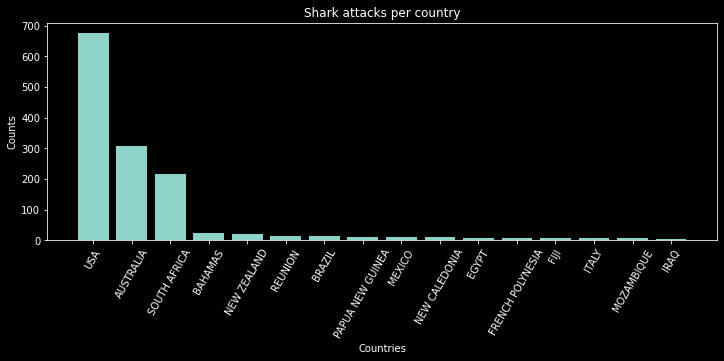

In [10]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
plt.bar(country_data.index, 'Country', data=country_data)
plt.xticks(country_data.index, rotation='60')
plt.title('Shark attacks per country')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.show()

# Looking into 'sex'

In [11]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [12]:
df.rename(columns={'Sex ':'sex', 'Species ': 'species'}, inplace=True)
df.rename(str.lower, axis='columns', inplace=True)

In [13]:
df.sex.value_counts()

M      1228
F       193
lli       1
Name: sex, dtype: int64

In [14]:
df['sex'][df['sex'] == 'lli'] = 'M'

<ipython-input-14-e6d21d8b00c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 'lli'] = 'M'


In [15]:
sex_percentage = df.sex.value_counts() * 100 / df.sex.count()
df.sex.value_counts(), sex_percentage

(M    1229
 F     193
 Name: sex, dtype: int64,
 M    86.427567
 F    13.572433
 Name: sex, dtype: float64)

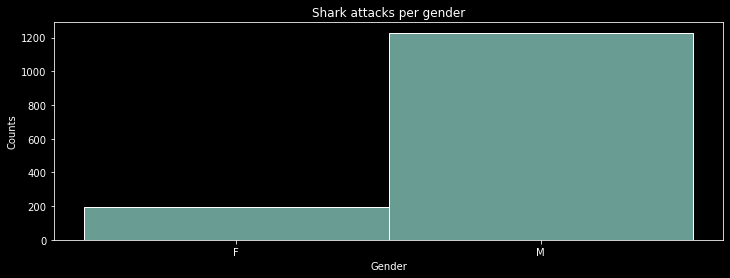

In [16]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
sns.histplot(x='sex', data=df)
plt.title('Shark attacks per gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

# Look if the attack was fatal or not...

In [17]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order'],
      dtype='object')

In [18]:
df['fatal (y/n)'].value_counts()

N       1186
Y        232
 N         2
M          1
2017       1
Name: fatal (y/n), dtype: int64

In [19]:
df['fatal (y/n)'][(df['fatal (y/n)'] == '2017') | (df['fatal (y/n)'] == 'M')] = 'unknown'

<ipython-input-19-d561d4d62759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatal (y/n)'][(df['fatal (y/n)'] == '2017') | (df['fatal (y/n)'] == 'M')] = 'unknown'


In [20]:
df['fatal (y/n)'][df['fatal (y/n)'] == ' N'] = 'N'

<ipython-input-20-14ab222ac970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatal (y/n)'][df['fatal (y/n)'] == ' N'] = 'N'


In [21]:
df['fatal (y/n)'].value_counts()

N          1188
Y           232
unknown       2
Name: fatal (y/n), dtype: int64

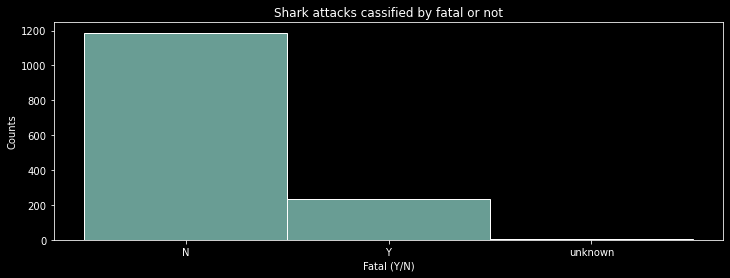

In [22]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
sns.histplot(x='fatal (y/n)', data=df)
plt.title('Shark attacks cassified by fatal or not')
plt.xlabel('Fatal (Y/N)')
plt.ylabel('Counts')
plt.show()

# Looking into 'type'

In [23]:
df.type.value_counts()

Unprovoked      1288
Provoked         107
Boating           17
Invalid            5
Sea Disaster       5
Name: type, dtype: int64

In [24]:
df['type'][(df.type == 'Boating') | (df.type == 'Invalid') | (df.type == 'N')] = 'unknown'

<ipython-input-24-63ece8d39531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][(df.type == 'Boating') | (df.type == 'Invalid') | (df.type == 'N')] = 'unknown'


In [25]:
df['type'][(df.type == 'Sea Disaster')] = 'Unprovoked'

<ipython-input-25-ff304176d8ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][(df.type == 'Sea Disaster')] = 'Unprovoked'


In [26]:
df.type.value_counts()

Unprovoked    1293
Provoked       107
unknown         22
Name: type, dtype: int64

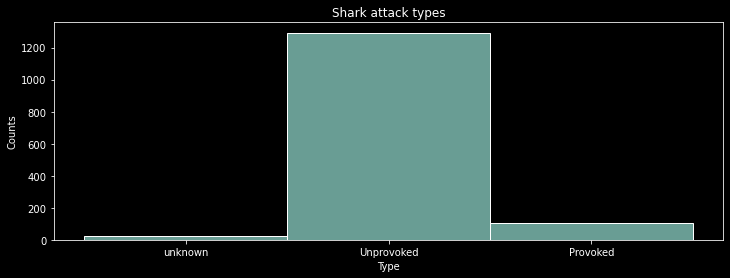

In [27]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
sns.histplot(x='type', data=df)
plt.title('Shark attack types')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

# Looking into 'activity'

In [28]:
df.activity.value_counts()

Surfing                                                  404
Swimming                                                 194
Spearfishing                                             100
Wading                                                    46
Fishing                                                   45
                                                        ... 
Washing sand off a speared fish                            1
Holding shark on leader & dangling it above the water      1
Skindiving, fish at belt                                   1
Helping friend land hooked shark                           1
Feeding mullet to sharks                                   1
Name: activity, Length: 338, dtype: int64

In [29]:
df.activity = df.activity.str.lower()
df.activity = df.activity.str.strip()

In [30]:
activity_array = df.activity.unique()

In [31]:
activity_serie = df.activity.value_counts()

In [32]:
activity_serie.index[:40]

Index(['surfing', 'swimming', 'spearfishing', 'fishing', 'wading',
       'body boarding', 'snorkeling', 'standing', 'scuba diving',
       'body surfing', 'treading water', 'diving', 'boogie boarding',
       'kayaking', 'free diving', 'surf skiing', 'walking',
       'free diving for abalone', 'bathing', 'paddle boarding', 'windsurfing',
       'surfing (sitting on his board)', 'surf-skiing', 'diving for abalone',
       'floating', 'playing', 'jumping', 'hookah diving for abalone',
       'spearfishing / scuba diving (at surface)', 'paddleskiing',
       'kite surfing', 'scuba diving (but on surface)',
       'stand-up paddleboarding', 'lifesaving drill', 'playing in the surf',
       'jumped into the water', 'sitting on surfboard',
       'swimming from the new venture', 'kayaking / fishing',
       'free diving & spearfishing'],
      dtype='object')

In [33]:
patt = ['surfing', 'swimming', 'spearfishing', 'wading', 'fishing',
       'body boarding', 'snorkeling', 'standing', 'unknown', 'scuba diving',
       'body surfing', 'diving', 'treading water', 'boogie boarding',
       'free diving', 'surf skiing', 'walking', 'free diving for abalone',
       'paddle boarding', 'windsurfing', 'bathing',
       'surfing (sitting on his board)', 'surf-skiing', 'unprovoked',
       'floating', 'diving for abalone', 'playing',
       'hookah diving for abalone', 'jumping',
       'spearfishing / scuba diving (at surface)', 'kayaking', 'kite surfing',
       'scuba diving (but on surface)', 'paddleskiing',
       'stand-up paddleboarding', 'swimming / snorkeling',
       'paddling on surfboard', 'surfing, paddling seawards',
       'free diving, spearfishing', 'sup']

# Looking into dates

In [35]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order'],
      dtype='object')

In [36]:
df.rename(columns={'case number':'case_number'}, inplace=True)

In [37]:
df['_year'] = df.case_number.str.split('.')

In [38]:
df['_year'].loc[df._year.str.len() < 3] = np.nan

/Users/gerardovitaleerrico/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [39]:
df['months'] = df._year.str[1]

In [40]:
df['months'][df.months == '00'] = np.nan

<ipython-input-40-61f9002f3cb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['months'][df.months == '00'] = np.nan


In [41]:
df.date = pd.to_datetime(df.date, format='%m', errors='coerce')

In [42]:
months_data = df.months.value_counts().to_frame()

In [43]:
months_data = months_data.sort_index()

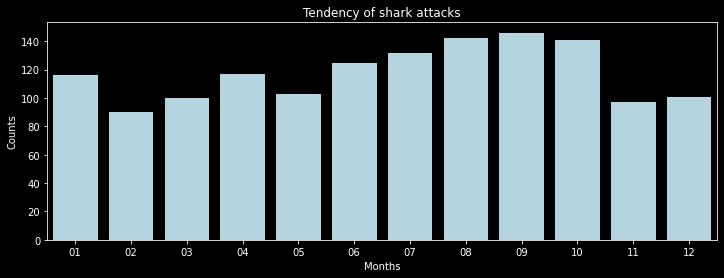

In [44]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot()
sns.barplot(x=months_data.index, y='months', data=months_data, color='lightblue')
plt.title('Tendency of shark attacks')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.show()

# Looking into 'age'

In [45]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', '_year', 'months'],
      dtype='object')

In [46]:
df.age.unique()

array(['57', '18', '15', '32', '21', '30', '60', '33', '19', '25', '10',
       '69', '55', '35', '20', '54', '22', '31', '40', '37', '13', '34',
       '50', '46', '48', '17', '28', '65', '73', '58', '36', '60s', '51',
       '61', '59', '42', '6', '23', '29', '39', '24', '12', '26', '11',
       '71', '43', '44', '14', '27', '62', '52', '38', '68', '16', '47',
       '63', '70', '9', '41', '40s', '53', '20s', '7', '66', '45', '74',
       '64', '8', '56', '49', '18 or 20', 'Teen', '30s', '77', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '5', ' 30', ' 28', "60's", '>50',
       '30 & 32', '13 or 18', '7 or 8', '9 or 10', '13 or 14'],
      dtype=object)

In [47]:
df.age.value_counts()

19          63
18          58
15          54
20          53
17          53
            ..
Teen         1
 30          1
40s          1
13 or 14     1
             1
Name: age, Length: 89, dtype: int64